In [61]:
#Cargar las librerias 

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Librerias para implementacion de  modelos de ciencia de datos 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# Cargar los datos desde el archivo CSV
DatosRl = pd.read_csv('./Car details v3.csv', encoding='latin1')

In [47]:
DatosRl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nombre                      8128 non-null   object 
 1   año                         7787 non-null   float64
 2   precio de venta             7787 non-null   float64
 3   km recorridos               7787 non-null   float64
 4   combustible                 7787 non-null   object 
 5   tipo de vendedor            7787 non-null   object 
 6   transmisión                 7787 non-null   object 
 7   propietario                 7787 non-null   object 
 8   rendimiento de combustible  7566 non-null   object 
 9   motor                       7566 non-null   object 
 10  potencia máxima             7572 non-null   object 
 11  torque                      7565 non-null   object 
 12  asientos                    7566 non-null   float64
dtypes: float64(4), object(9)
memory u

In [32]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

DatosRl.head(8127)

,nombre,año,precio de venta,km recorridos,combustible,tipo de vendedor,transmisión,propietario,rendimiento de combustible,motor,potencia máxima,torque,asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,"Hyundai Verna CRDi SX,2007,135000,119000,Diese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [33]:
#Descripcion de los datos 
DatosRl.describe()

,año,precio de venta,km recorridos,asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


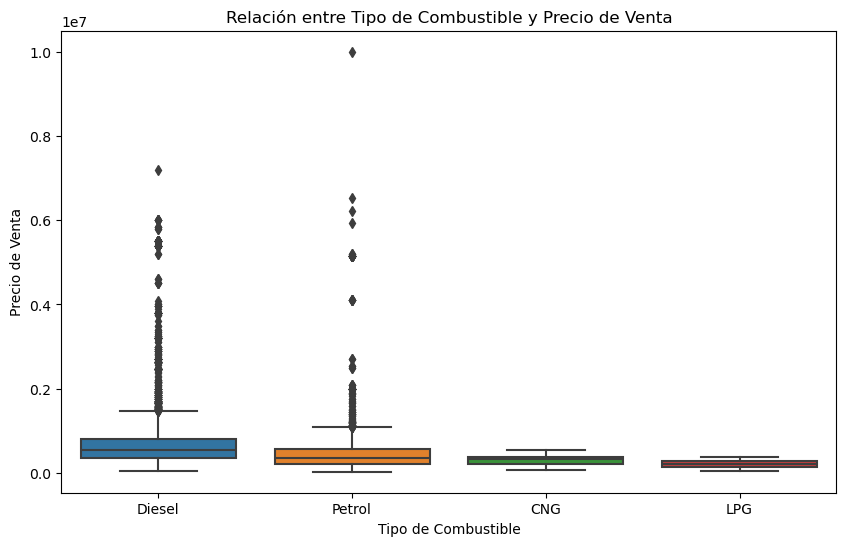

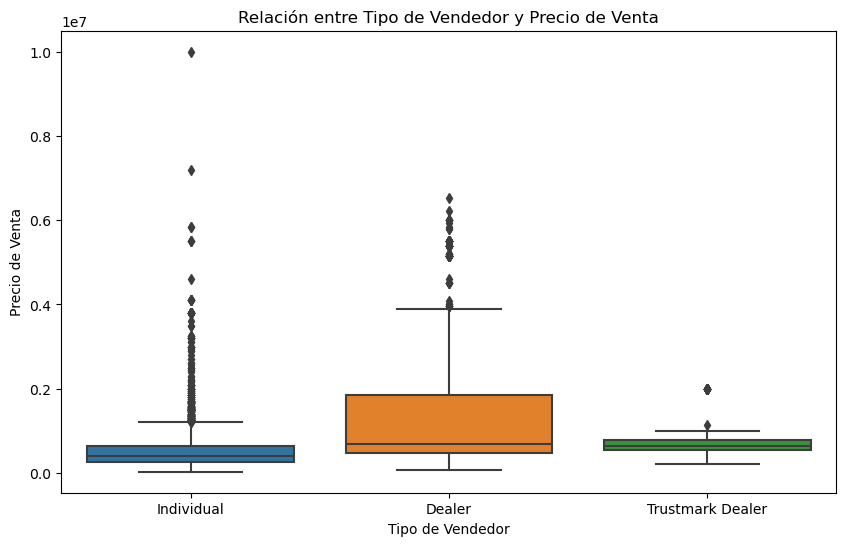

In [39]:
# Visualización de relaciones entre variables categóricas y el precio de venta
plt.figure(figsize=(10, 6))
sns.boxplot(x='combustible', y='precio de venta', data=DatosRl)
plt.title('Relación entre Tipo de Combustible y Precio de Venta')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo de vendedor', y='precio de venta', data=DatosRl)
plt.title('Relación entre Tipo de Vendedor y Precio de Venta')
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Precio de Venta')
plt.show()

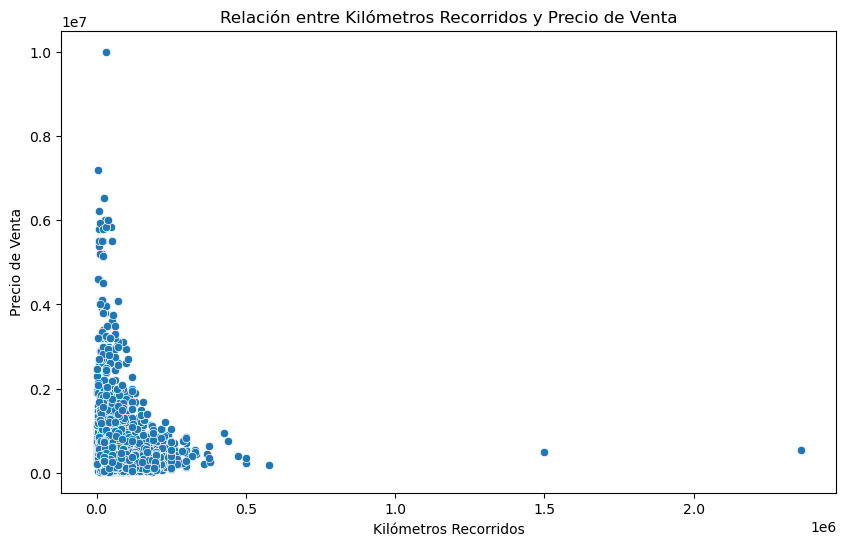

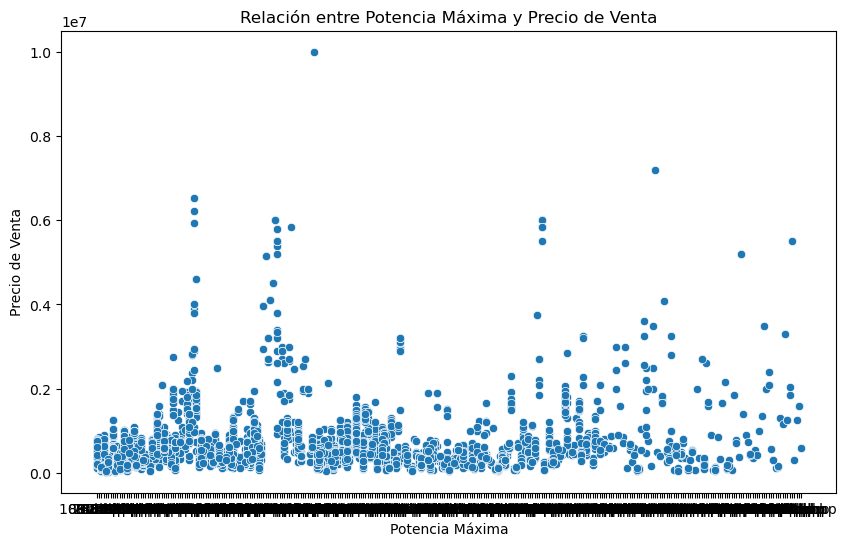

In [42]:
# Visualización de relaciones entre variables numéricas y el precio de venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km recorridos', y='precio de venta', data=DatosRl)
plt.title('Relación entre Kilómetros Recorridos y Precio de Venta')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='potencia máxima', y='precio de venta', data=DatosRl)
plt.title('Relación entre Potencia Máxima y Precio de Venta')
plt.xlabel('Potencia Máxima')
plt.ylabel('Precio de Venta')
plt.show()

C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


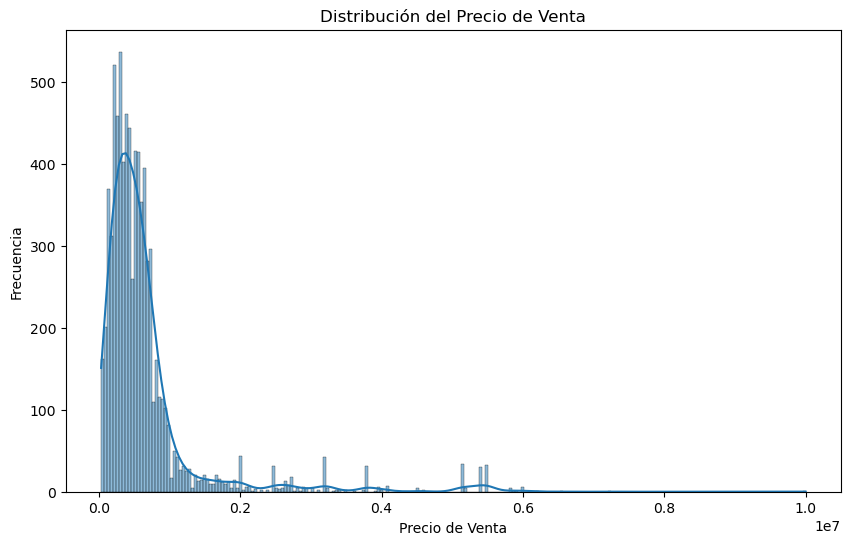

In [52]:
# Visualización de distribución de la variable objetivo (precio de venta)
plt.figure(figsize=(10, 6))
sns.histplot(DatosRl['precio de venta'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

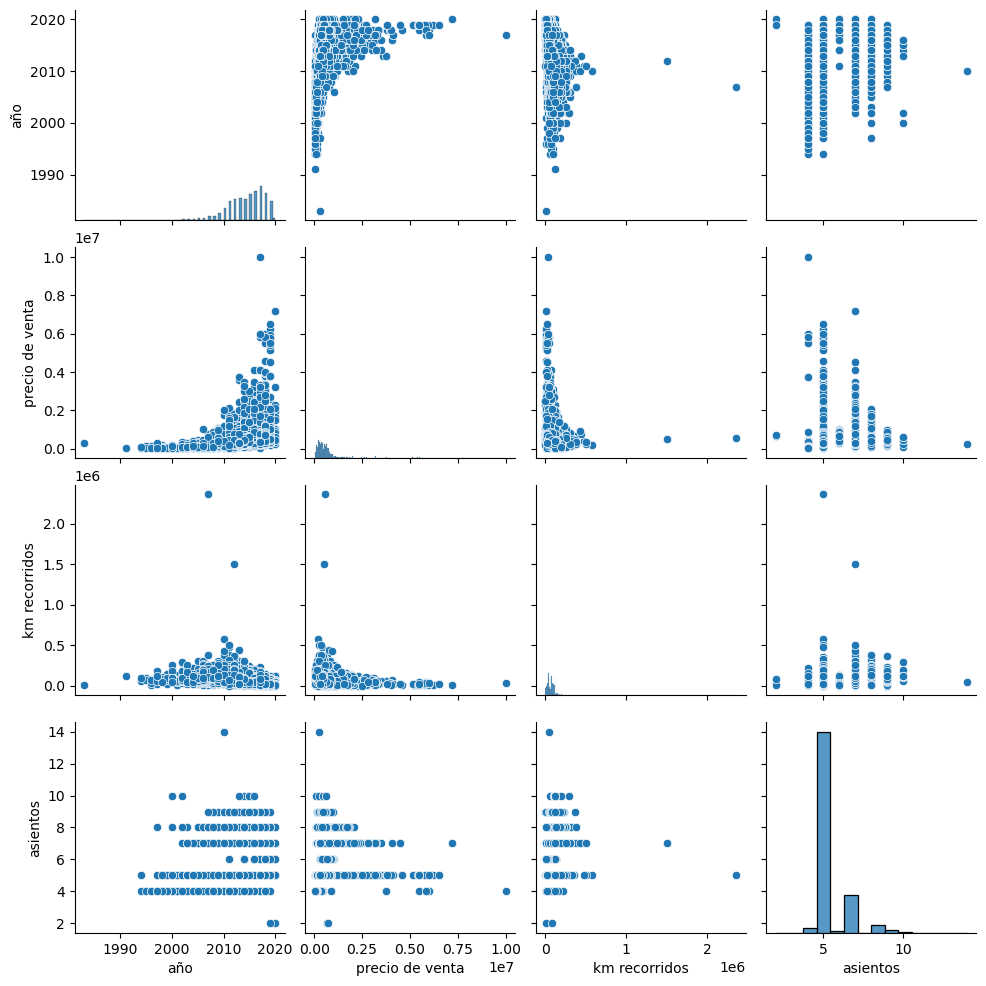

In [53]:
# Visualización de relaciones entre variables numéricas
sns.pairplot(DatosRl)
plt.show()


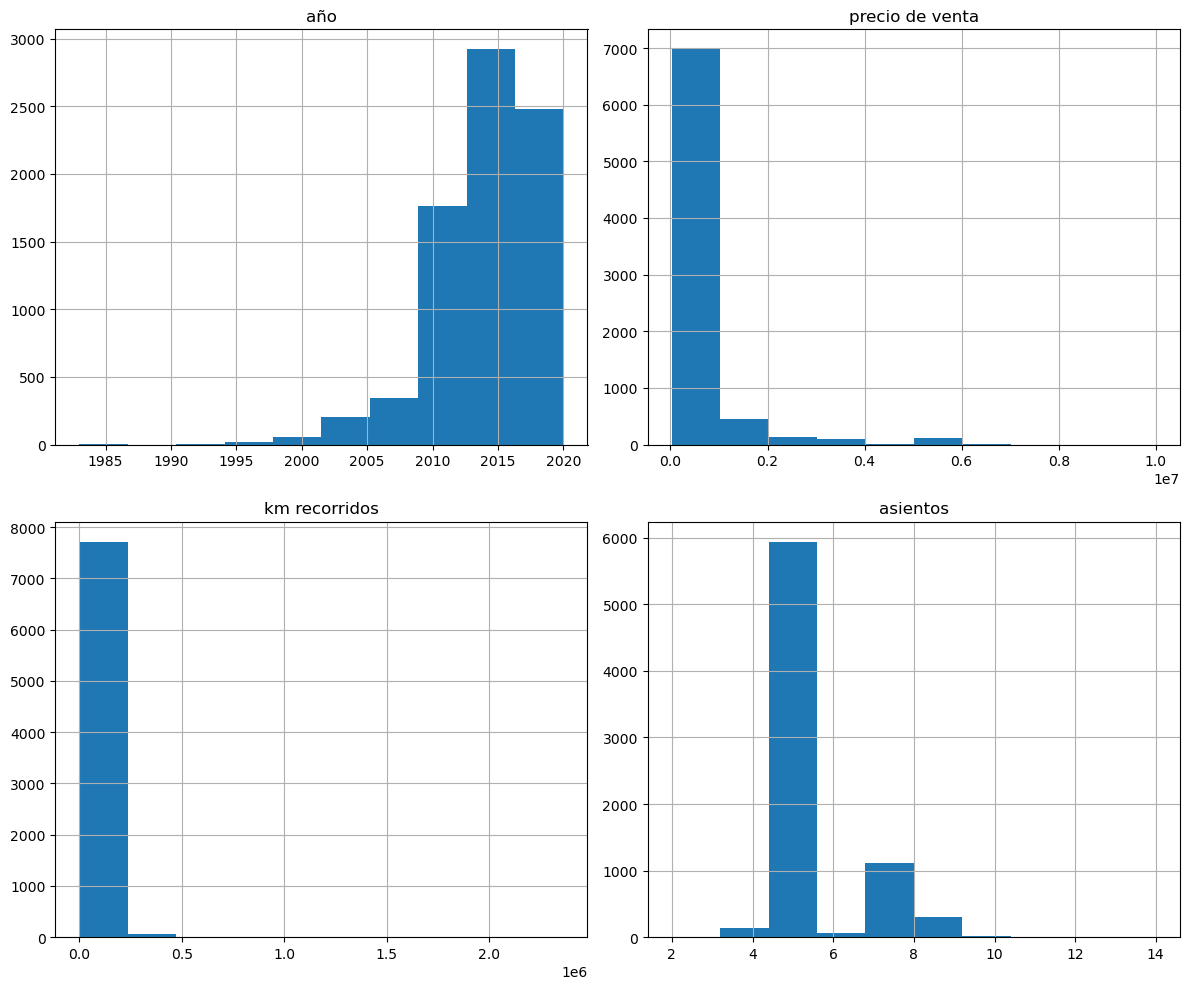

In [87]:
# También puedes explorar la distribución de las variables numéricas con histogramas
DatosRl.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [55]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Verificar si hay valores faltantes en el conjunto de datos

missing_values = DatosRl.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
nombre                          0
año                           341
precio de venta               341
km recorridos                 341
combustible                   341
tipo de vendedor              341
transmisión                   341
propietario                   341
rendimiento de combustible    562
motor                         562
potencia máxima               556
torque                        563
asientos                      562
dtype: int64


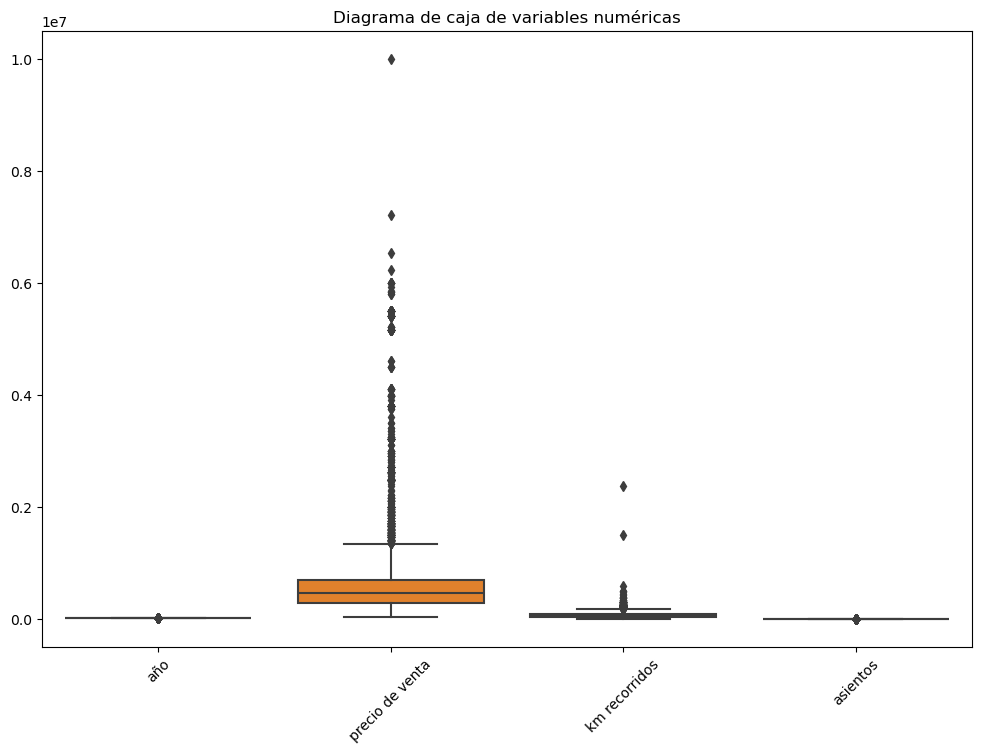

In [88]:

# Visualizar diagramas de caja para identificar datos atípicos en las variables numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=DatosRl[numeric_features])
plt.title('Diagrama de caja de variables numéricas')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para facilitar la lectura
plt.show()

In [90]:
# Tratar valores faltantes
DatosRl.dropna(inplace=True)  # Eliminar filas con valores faltantes
# Eliminar duplicados
DatosRl.drop_duplicates(inplace=True)  # Eliminar filas duplicadas

In [93]:
# Manejar valores atípicos
# filtro para eliminar filas con valores atípicos en la variable 'precio de venta, año, km recorridos' 

Q1 = DatosRl['precio de venta'].quantile(0.25)
Q3 = DatosRl['precio de venta'].quantile(0.75)
IQR = Q3 - Q1
DatosRl = DatosRl[~((DatosRl['precio de venta'] < (Q1 - 1.5 * IQR)) | (DatosRl['precio de venta'] > (Q3 + 1.5 * IQR)))]

Q1 = DatosRl['año'].quantile(0.25)
Q3 = DatosRl['año'].quantile(0.75)
IQR = Q3 - Q1
DatosRl = DatosRl[~((DatosRl['año'] < (Q1 - 1.5 * IQR)) | (DatosRl['año'] > (Q3 + 1.5 * IQR)))]

Q1 = DatosRl['km recorridos'].quantile(0.25)
Q3 = DatosRl['km recorridos'].quantile(0.75)
IQR = Q3 - Q1
DatosRl = DatosRl[~((DatosRl['km recorridos'] < (Q1 - 1.5 * IQR)) | (DatosRl['km recorridos'] > (Q3 + 1.5 * IQR)))]


In [94]:
# Verificar la forma del dataframe después de la limpieza
print("Forma del dataframe después de la limpieza:", DatosRl.shape)

Forma del dataframe después de la limpieza: (5729, 13)


In [103]:
# Checking Null values
DatosRl.isnull().sum()*100/DatosRl.shape[0]


nombre                        0.0
año                           0.0
precio de venta               0.0
km recorridos                 0.0
combustible                   0.0
tipo de vendedor              0.0
transmisión                   0.0
propietario                   0.0
rendimiento de combustible    0.0
motor                         0.0
potencia máxima               0.0
torque                        0.0
asientos                      0.0
dtype: float64

In [108]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


DatosRl['precio de venta'].value_counts()

precio de venta
300000.0    193
350000.0    185
600000.0    162
400000.0    158
500000.0    151
           ... 
308000.0      1
486000.0      1
242000.0      1
654000.0      1
746000.0      1
Name: count, Length: 497, dtype: int64

In [110]:
DatosRl[['precio de venta']].head(40)

,precio de venta
0,450000.0
1,370000.0
3,225000.0
5,440000.0
8,350000.0
9,200000.0
10,500000.0
11,92000.0
12,280000.0
14,180000.0


In [127]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test para evaluar correctamente el modelo.
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
X = DatosRl.drop('precio de venta', axis=1)
Y = DatosRl['precio de venta']
X_numerical = DatosRl.select_dtypes(include=['float64', 'int64'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [128]:
print(X_train)

                                       nombre     año  km recorridos  \
7140            Nissan Micra Active XL Petrol  2017.0        40000.0   
6290                         Datsun GO Plus T  2017.0        65000.0   
3566              Hyundai i20 Sportz 1.4 CRDi  2014.0        70000.0   
3935              Maruti Wagon R VXI Optional  2018.0         5000.0   
6144                          Honda Brio S MT  2013.0        80000.0   
...                                       ...     ...            ...   
6915                           Toyota Etios G  2015.0       110000.0   
4484  Renault Duster 85PS Diesel RxL Optional  2013.0        96000.0   
2184                      Honda City 1.5 S MT  2009.0        68600.0   
3443   Toyota Innova 2.5 GX (Diesel) 7 Seater  2013.0        35000.0   
3633                  Mahindra Bolero SLX 2WD  2011.0        90000.0   

     combustible tipo de vendedor transmisión   propietario  \
7140      Petrol       Individual      Manual   First Owner   
6290     

In [130]:
print(Y_train)

7140    370000.0
6290    325000.0
3566    440000.0
3935    459999.0
6144    300000.0
          ...   
6915    360000.0
4484    400000.0
2184    250000.0
3443    400000.0
3633    445000.0
Name: precio de venta, Length: 4296, dtype: float64


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define la cuadrícula de hiperparámetros a explorar
param_grid = {
    'fit_intercept': [True, False]  # Opción para ajustar la intercepción
}

# Crea una instancia de regresión lineal
modelo_regresion = LinearRegression()

# Utiliza la búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(modelo_regresion, param_grid, cv=5)
grid_search.fit(X_train_num, Y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrena el modelo con los mejores hiperparámetros
modelo_final = grid_search.best_estimator_
modelo_final.fit(X_train_num, Y_train)


Mejores hiperparámetros: {'fit_intercept': True}


LinearRegression()

In [136]:
print (Y_test)

3820    200000.0
2290    250000.0
36      366000.0
122     850000.0
704     590000.0
          ...   
2718    570000.0
3049    650000.0
7376    750000.0
5065    270000.0
283     290000.0
Name: precio de venta, Length: 1433, dtype: float64


In [137]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predecir los precios en el conjunto de test
predicciones = modelo_final.predict(X_test_num)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(Y_test, predicciones)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(Y_test, predicciones)
print("Coeficiente de Determinación (R^2):", r2)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(Y_test, predicciones)
print("Error Absoluto Medio (MAE):", mae)


Error Cuadrático Medio (MSE): 1.8029374094928307e-21
Coeficiente de Determinación (R^2): 1.0
Error Absoluto Medio (MAE): 2.6103069151791342e-11


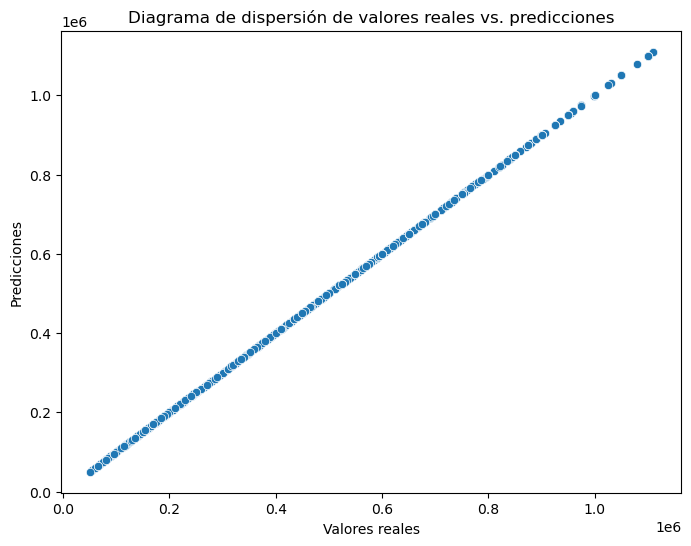

In [138]:
# Diagrama de dispersión de valores reales vs. predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de dispersión de valores reales vs. predicciones')
plt.show()

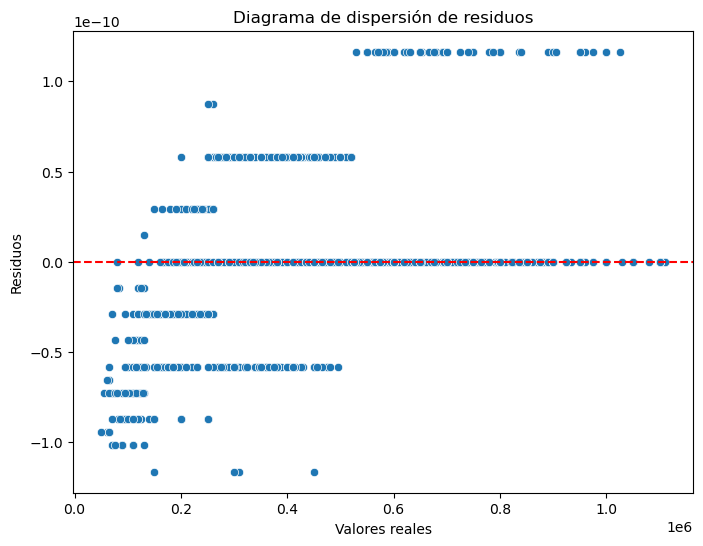

In [139]:
# Diagrama de dispersión de residuos
residuos = Y_test - predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')
plt.title('Diagrama de dispersión de residuos')
plt.show()

C:\Users\kvnsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


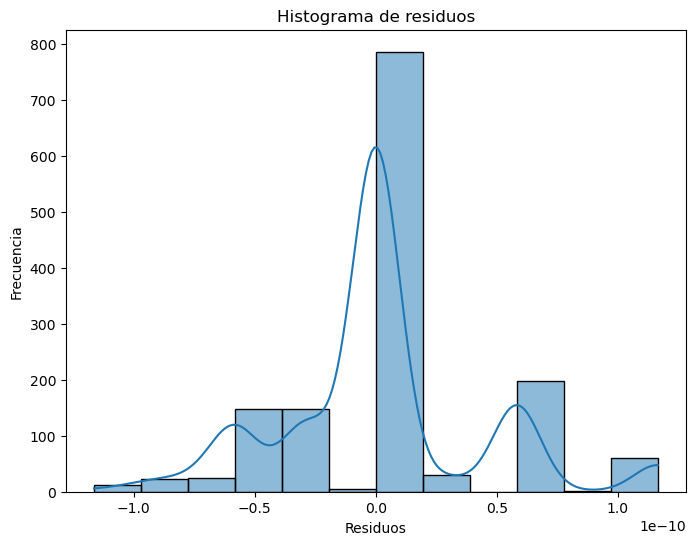

In [140]:

# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

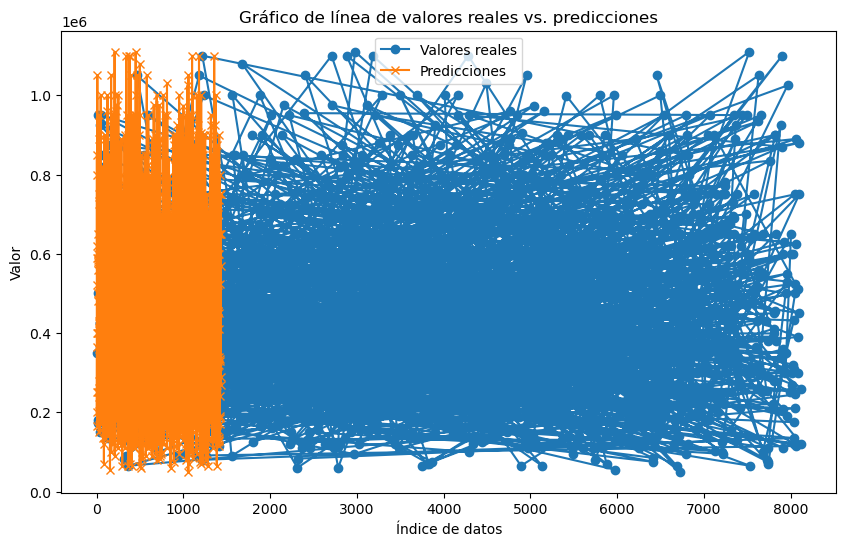

In [141]:
# Gráfico de línea de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Valores reales', marker='o')
plt.plot(predicciones, label='Predicciones', marker='x')
plt.xlabel('Índice de datos')
plt.ylabel('Valor')
plt.title('Gráfico de línea de valores reales vs. predicciones')
plt.legend()
plt.show()